# Inspect Seed Labels

#### July 8 2024

#### Author: jrose

This notebook covers inspection of the scANVI-seed-labeled BigRef object

In [1]:
import scanpy as sc
import numpy as np
import scvi
import os

/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scvi.settings.seed = 1990
print("Last run with scvi-tools version:", scvi.__version__)

Global seed set to 1990


Last run with scvi-tools version: 1.0.4


In [5]:
data_dir="/home/Projects/Scharer_sc/scAtlas_ref/analysis"
file="BigRef_SLE_Bcell_AnnData_scANVI_seedlbl.h5ad"

adata_path = os.path.join(data_dir, file)

adata = sc.read(adata_path)
adata

/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 106005 × 2133
    obs: 'batch', 'indiv', 'ancestry', 'disease_status', 'age', 'coarse_lbl', 'fine_lbl', 'disease_state', 'sex', 'study', 'labels', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p'
    layers: 'counts'

In [24]:
adata.obs['ancestry'].value_counts()

ancestry
Asian               56450
European            41994
African American     6767
Hispanic              794
Name: count, dtype: int64

In [25]:
adata.obs['sex'].value_counts()

sex
Female    99248
Male       6757
Name: count, dtype: int64

In [26]:
adata.obs['study'].value_counts()

study
Per    92529
SW     13476
Name: count, dtype: int64

### Load the scANVI model

In [6]:
model = scvi.model.SCANVI.load("./BigRef_SLE_scANVI_model_seedlbl", adata=adata)

INFO     File ./BigRef_SLE_scANVI_model_seedlbl/model.pt already downloaded                                        


/home/Apps/miniconda3/envs/scvi/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


In [9]:
SCANVI_LATENT_KEY = "X_scANVI"
SCANVI_PREDICTIONS_KEY = "C_scANVI"

adata.obsm[SCANVI_LATENT_KEY] = model.get_latent_representation(adata)
adata.obs[SCANVI_PREDICTIONS_KEY] = model.predict(adata)

/home/Apps/miniconda3/envs/scvi/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


In [23]:
adata.obs[SCANVI_PREDICTIONS_KEY].value_counts()

C_scANVI
Naive B cells           85569
Memory B cells          14560
ABCs                     2680
Transitional B cells     2026
Plasmablasts             1170
Name: count, dtype: int64

In [10]:
sc.pp.neighbors(adata, use_rep=SCANVI_LATENT_KEY)
sc.tl.umap(adata)

/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


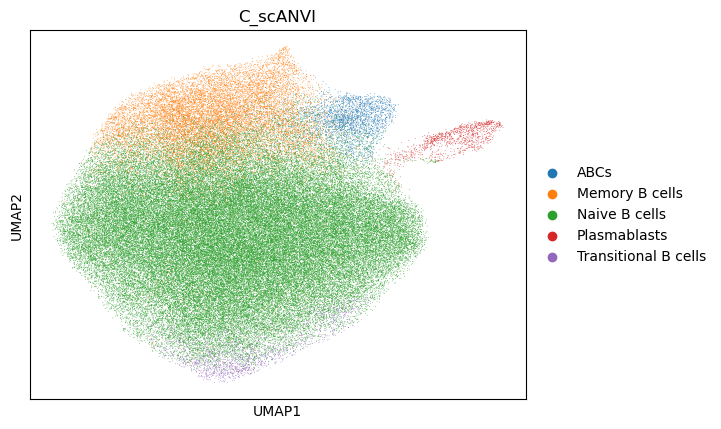

In [11]:
sc.pl.umap(adata, color=[SCANVI_PREDICTIONS_KEY])

/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_m

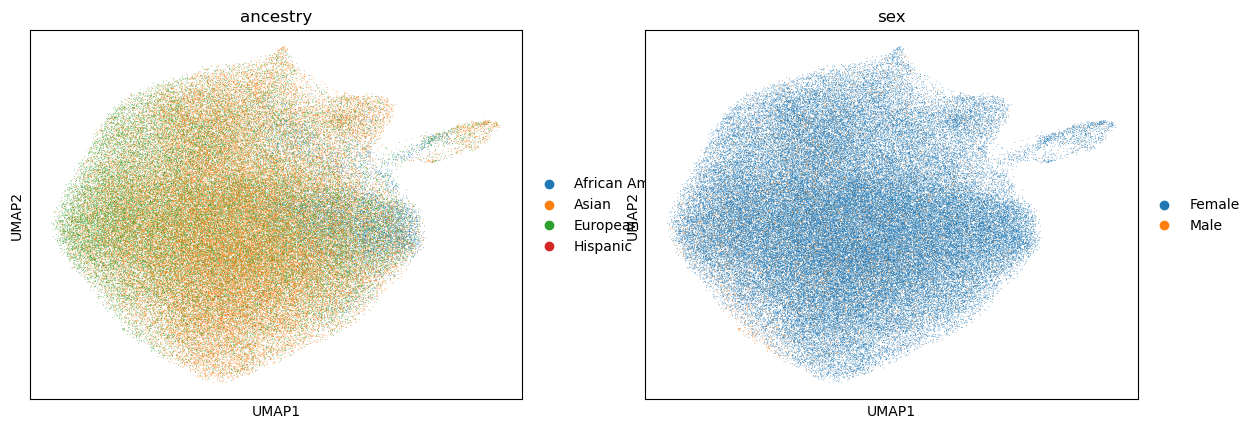

In [13]:
sc.pl.umap(adata, color=['ancestry','sex'])

/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


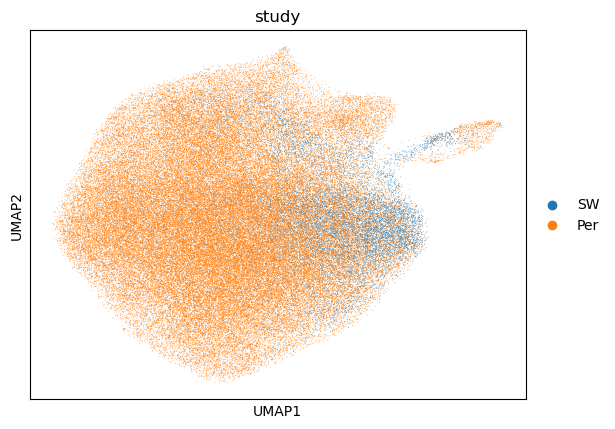

In [14]:
sc.pl.umap(adata, color=['study'])

Overall it looks like the scANVI tool has done a relatively good job of integrating the two studies. There are clear distinctions between the "gold standard" B cell subset labels derived from the SlightWebb study applied to the larger Perez study cells. 

### Gene expression checks

Let's do some checks of the gene expression of each cell type group

In [17]:
marker_genes_dict = {
    'Naive': ['CD79A', 'PAX5', 'BACH2'],
    'Memory': ['CD27', 'CD70'],
    #'PB':['IGHM','IGHD', 'IGKC','JCHAIN','IGLC2'],
    'Active': ['CD86', 'IRF4', 'IRF8'],
    'GC': ['BCL6', 'IL21R', 'IL4R','CXCR5'],
    'DN2': ['TBX21', 'ATF3', 'STAT4']
}

/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


categories: ABCs, Memory B cells, Naive B cells, etc.
var_group_labels: Naive, Memory, Active, etc.


/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


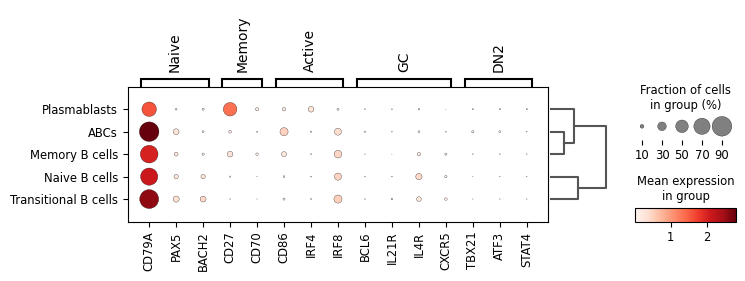

In [18]:
sc.pl.dotplot(adata, marker_genes_dict, SCANVI_PREDICTIONS_KEY, dendrogram=True)

categories: ABCs, Memory B cells, Naive B cells, etc.
var_group_labels: Naive, Memory, Active, etc.


/home/Apps/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


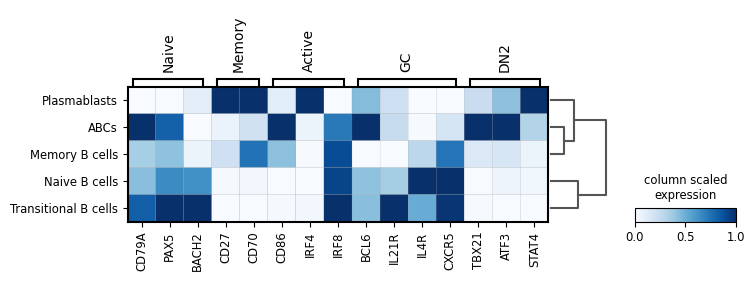

In [20]:
sc.pl.matrixplot(adata, marker_genes_dict, SCANVI_PREDICTIONS_KEY, dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

Much of these markers are lining up well. Let's do some overlaying on the UMAP

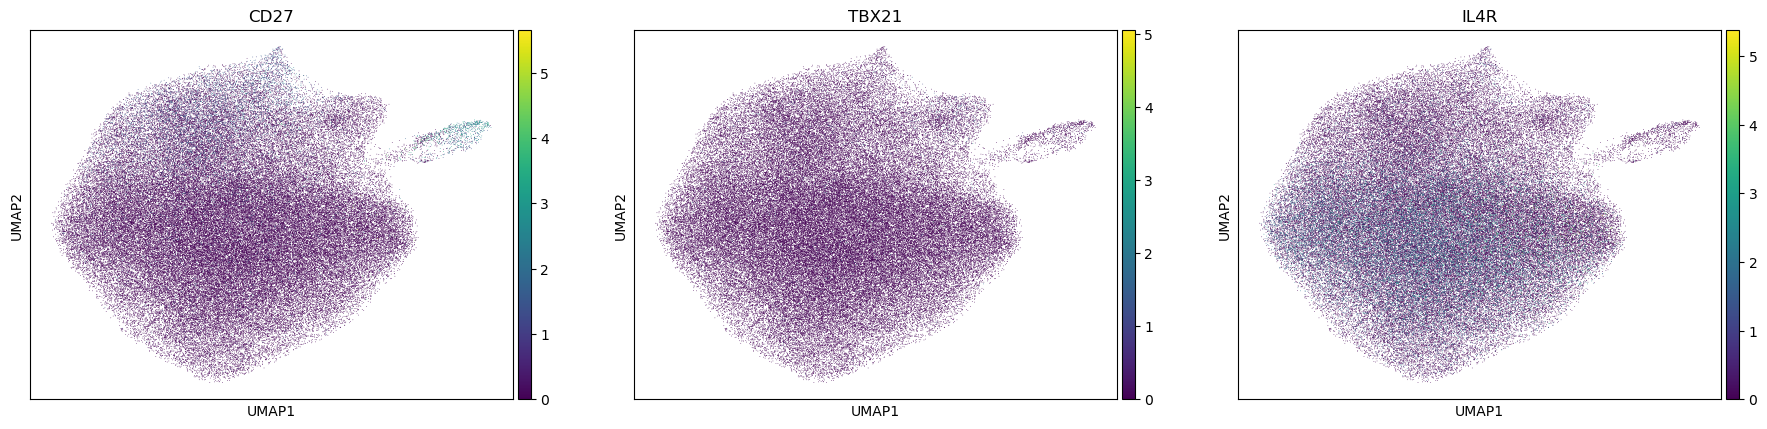

In [21]:
sc.pl.umap(adata, color=['CD27', 'TBX21', 'IL4R'])